<a href="https://colab.research.google.com/github/Tasfia48/Predictive_Policing/blob/master/Police_District_wise_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_percent = pd.read_csv('/content/drive/My Drive/CPD/Areas/com_dis_percentage.csv')
df_percent = df_percent[['dist_num','community','intersection_area_perc']]
#df_percent

In [3]:
df_com_profile = pd.read_csv('/content/drive/My Drive/CPD/Areas/CommunityAreaProfiles20132017.csv')
df_com_profile_race = df_com_profile[['GEOG','TOT_POP','WHITE',	'HISP',	'BLACK',	'ASIAN',	'OTHER']]
df_com_profile_race['community'] = df_com_profile_race['GEOG'].str.upper()
df_com_profile_race=df_com_profile_race.drop(columns=['GEOG'])
df_merged = pd.merge(df_com_profile_race,df_percent, on='community', how='outer', validate="one_to_many")
df_merged = df_merged.sort_values(by='dist_num')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_merged1=pd.DataFrame()
df_merged1['dist_num'] = df_merged['dist_num']
df_merged1['community'] = df_merged['community']
df_merged1['TOT_POP']=(df_merged['TOT_POP']*df_merged['intersection_area_perc'])/100
df_merged1['WHITE']=(df_merged['WHITE']*df_merged['intersection_area_perc'])/100
df_merged1['HISP']=(df_merged['HISP']*df_merged['intersection_area_perc'])/100
df_merged1['BLACK']=(df_merged['BLACK']*df_merged['intersection_area_perc'])/100
df_merged1['ASIAN']=(df_merged['ASIAN']*df_merged['intersection_area_perc'])/100
df_merged1['OTHER']=(df_merged['OTHER']*df_merged['intersection_area_perc'])/100
df_merged_new =df_merged1.groupby(['dist_num']).sum().reset_index()

In [5]:
df_merged_new = df_merged_new.apply(np.ceil) 
df_merged_new['dist_num']=df_merged_new['dist_num'].astype('int64')
#df_merged_new

Text(58.5, 0.5, 'District')

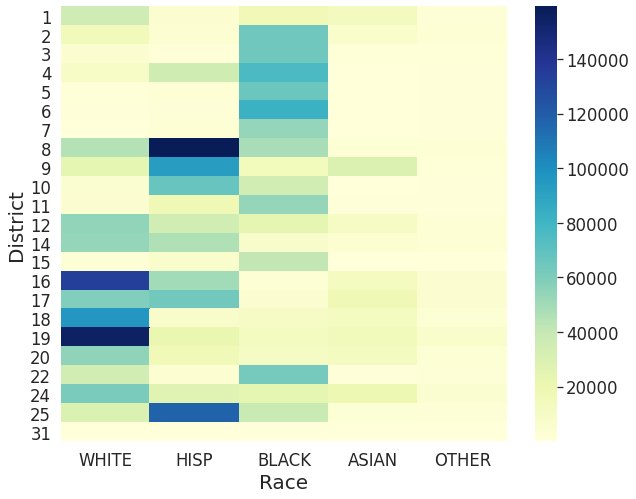

In [6]:
columns=df_merged_new[['WHITE',	'HISP', 'BLACK',	'ASIAN',	'OTHER']]
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.5)
sns.heatmap(columns,yticklabels=df_merged_new['dist_num'].values,cmap='YlGnBu')
plt.xlabel("Race", fontsize=20)
plt.ylabel('District', fontsize=20)

###Crime Data Analysis

In [7]:
df_crime = pd.read_csv('/content/drive/My Drive/CPD/Crime data/Crimes_-_2017_to_present.csv')
df_beat = pd.read_csv('/content/drive/My Drive/CPD/Crime data/PoliceBeatDec2012.csv')
df_beat['BEAT']= df_beat['BEAT_NUM']

In [8]:
violent_crimes = ['ARSON', 'ROBBERY','THEFT','HOMICIDE','MOTOR VEHICLE THEFT','BURGLARY','BATTERY','CRIMINAL SEXUAL ASSAULT','CRIM SEXUAL ASSAULT','CRIMINAL DAMAGE']
violent =[]
for index, row in df_crime.iterrows():
    x = row['Primary Type']
    if x in violent_crimes:      
      violent.append(True)
    else:
      violent.append(False)  

df_crime['Violent'] = violent      


In [9]:
#df_crime.head()

In [10]:
df_dis_beat = df_crime.groupby(['District','Beat']).count().reset_index()
df_dis_beat['count'] = df_dis_beat['ID']
df_dis_beat=df_dis_beat[['District','Beat','count']]

In [11]:
max = 0
result=[]
dis =[]
total =[]
varience =[]
for x in df_dis_beat['District'].unique():
  df = df_dis_beat[df_dis_beat['District']==x]
  tot = df.loc[:,"count"].sum()
  var = df.loc[:,"count"].var()
  varience.append(var)
  total.append(tot)
  dis.append(x)
  if var> max:
    max = var
    print("var",var)
    print("total",total)
    result= x
    print("Res",result) 
#print(result) 
df_var=pd.DataFrame()
df_var['District'] = dis
df_var['Variance'] = varience 
df_var['Number of Crime'] = total
df_var = df_var.round(1)
df_var['District'] = df_var['District'].astype('int64') 

var 5827883.692307692
total [50242]
Res 1.0
var 8613567.952380953
total [50242, 38585, 42041, 48083, 39449, 56016, 46834, 54233, 37771, 42123, 61893, 43981, 31611, 34173, 28759, 24796, 50395]
Res 18.0


In [12]:

df_var

,District,Variance,Number of Crime
0,1,5827883.7,50242
1,2,1286108.3,38585
2,3,2675957.8,42041
3,4,3401019.7,48083
4,5,4841314.3,39449
5,6,4908209.4,56016
6,7,1459962.7,46834
7,8,2255641.8,54233
8,9,825714.8,37771
9,10,2096171.0,42123


Text(0.5, 0, 'District')

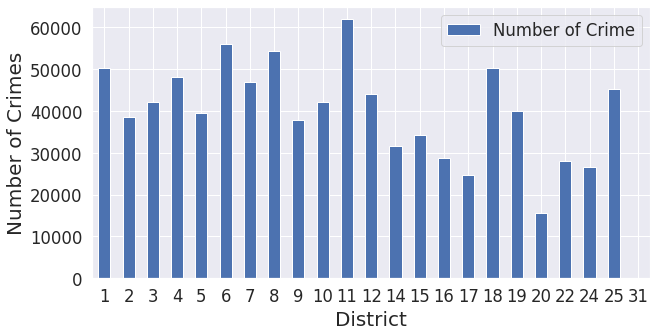

In [13]:
df_var.plot.bar(x='District', y='Number of Crime', rot=0,figsize=(10,5))
plt.ylabel("Number of Crimes", fontsize=20)
plt.xlabel('District', fontsize=20)

Text(0.5, 0, 'District')

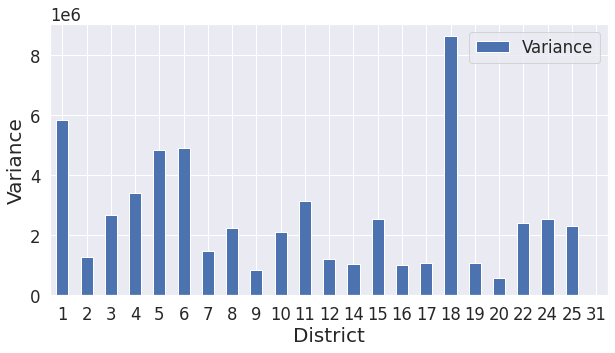

In [14]:
df_var.plot.bar(x='District', y='Variance', rot=0,figsize=(10,5))
plt.ylabel("Variance", fontsize=20)
plt.xlabel('District', fontsize=20)

Text(0.5, 0, 'Beat')

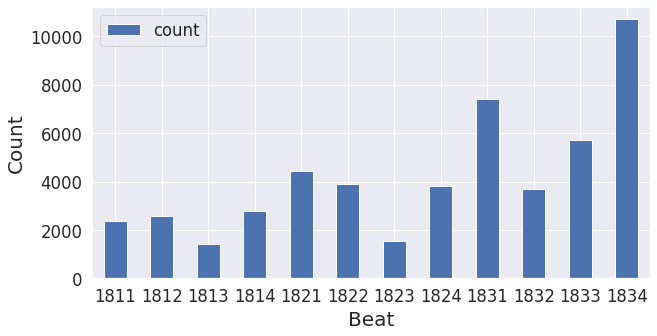

In [15]:
df_18 = df_dis_beat[df_dis_beat['District']==18]
df_18 = df_18[(df_18['Beat'] > 1800) &(df_18['Beat'] < 1900) ]
df_18.plot.bar(x='Beat', y='count', rot=0,figsize=(10,5))
plt.ylabel("Count", fontsize=20)
plt.xlabel('Beat', fontsize=20)

Text(0.5, 0, 'Beat')

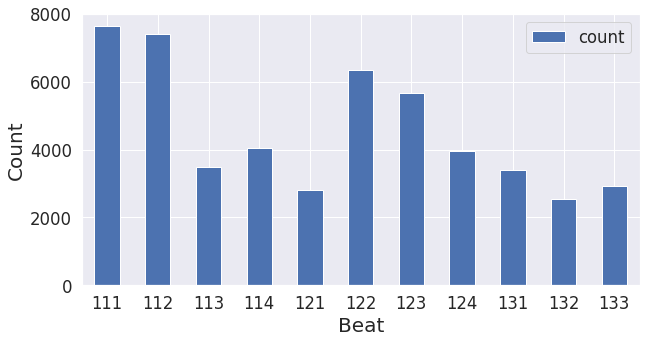

In [16]:
df_1 = df_dis_beat[df_dis_beat['District']==1]
df_1 = df_1[df_1['Beat'] <200 ]
df_1.plot.bar(x='Beat', y='count', rot=0,figsize=(10,5))
plt.ylabel("Count", fontsize=20)
plt.xlabel('Beat', fontsize=20)

### Funtions

In [17]:
def district_wise_beats(df,district_no):
    df1=df[df['District'] == district_no]
    df1['Date'] = pd.to_datetime(df1['Date'])
    data = df1[df1['Year'] < 2020]
    data = data[(data['Beat'] > district_no*100) & (data['Beat'] < (district_no+1)*100) ]
    data['Month'] = data['Date'].dt.month 
    data['BEAT'] = data['Beat']
    data = data.join(df_beat.set_index('BEAT'), on='BEAT')
    return data

def groupList(df,B_no):
  df_one = df[df['BEAT'] == B_no]
  df_one = df_one.groupby(['Year','Month']).count().reset_index()
  #df_one = df_one.groupby(['Date']).count().reset_index()
  df_one = df_one.rename(columns={'BEAT' :'count'})
  temp= df_one['count'].values
  return temp


def plotTimeSeriesDistrict(timeseries,ax,title):
  # plt.figure(figsize=(20,8))
  keys = timeseries.keys()
  for x in keys:
    ax.plot(timeseries[x],label="BEAT"+str(x))
  ax.legend(loc="upper left",fontsize=12)
  ax.set_xlabel("time (month,year)", fontsize=14)
  ax.set_ylabel('count', fontsize=14)
  ax.set_title(title)
  # plt.show()  

def district_wise_beats_stop(df,district_no):
  df1=df_stop[df_stop['DISTRICT'] == district_no]
  df1['CONTACT_DATE'] = pd.to_datetime(df1['CONTACT_DATE'])
  df1['Year'] = df1['CONTACT_DATE'].dt.year
  data = df1[df1['Year'] > 2016]
  data = data[(data['BEAT'] > district_no*100) & (data['BEAT'] < (district_no+1)*100) ]
  data['Month'] = data['CONTACT_DATE'].dt.month 
  df_beat_mod = df_beat[['BEAT','the_geom']]
  data = data.join(df_beat_mod.set_index('BEAT'), on='BEAT')
  return data  

def makeTimeseries(df,variable):
  timeseries = dict()
  for x in df[variable].unique():
   timeseries[x]=groupList(df,x)
  return timeseries

def plotTimeSeries(beat):
  plt.figure(figsize=(20,8))
  plt.plot(crime_timeseries_24[beat],label="Total Crime Data")
  plt.plot(arrest_timeseries_24[beat],label="Arrested Crime Data")
  plt.plot(violent_crimeseries_24[beat],label="Violent Crime Data")
  plt.plot(stop_timeseries_24[beat],label="Stop Data")
  plt.plot(arrested_stop_timeseries_24[beat],label="Arrested Stop Data")
  plt.legend(loc="upper left")
  plt.xlabel("time (month,year)", fontsize=12)
  plt.ylabel('count', fontsize=12)
  plt.show()  


In [19]:
## Crime data analysis for district 18
data = district_wise_beats(df_crime,18)
data = data.sort_values(by='BEAT')
arrest_data_24 = data[data['Arrest'] == True]
non_arrest_data_24 = data[data['Arrest']==False]
violent_crime_data_24 = data[data['Violent']==True]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#data

In [21]:
### Creating time series for crime, arrest and non-arrest data
crime_timeseries_24 = makeTimeseries(data,'BEAT')
non_arrest_timeseries_24 = makeTimeseries(non_arrest_data_24,'BEAT')
arrest_timeseries_24 = makeTimeseries(arrest_data_24,'BEAT')
violent_crimeseries_24 = makeTimeseries(violent_crime_data_24,'BEAT')


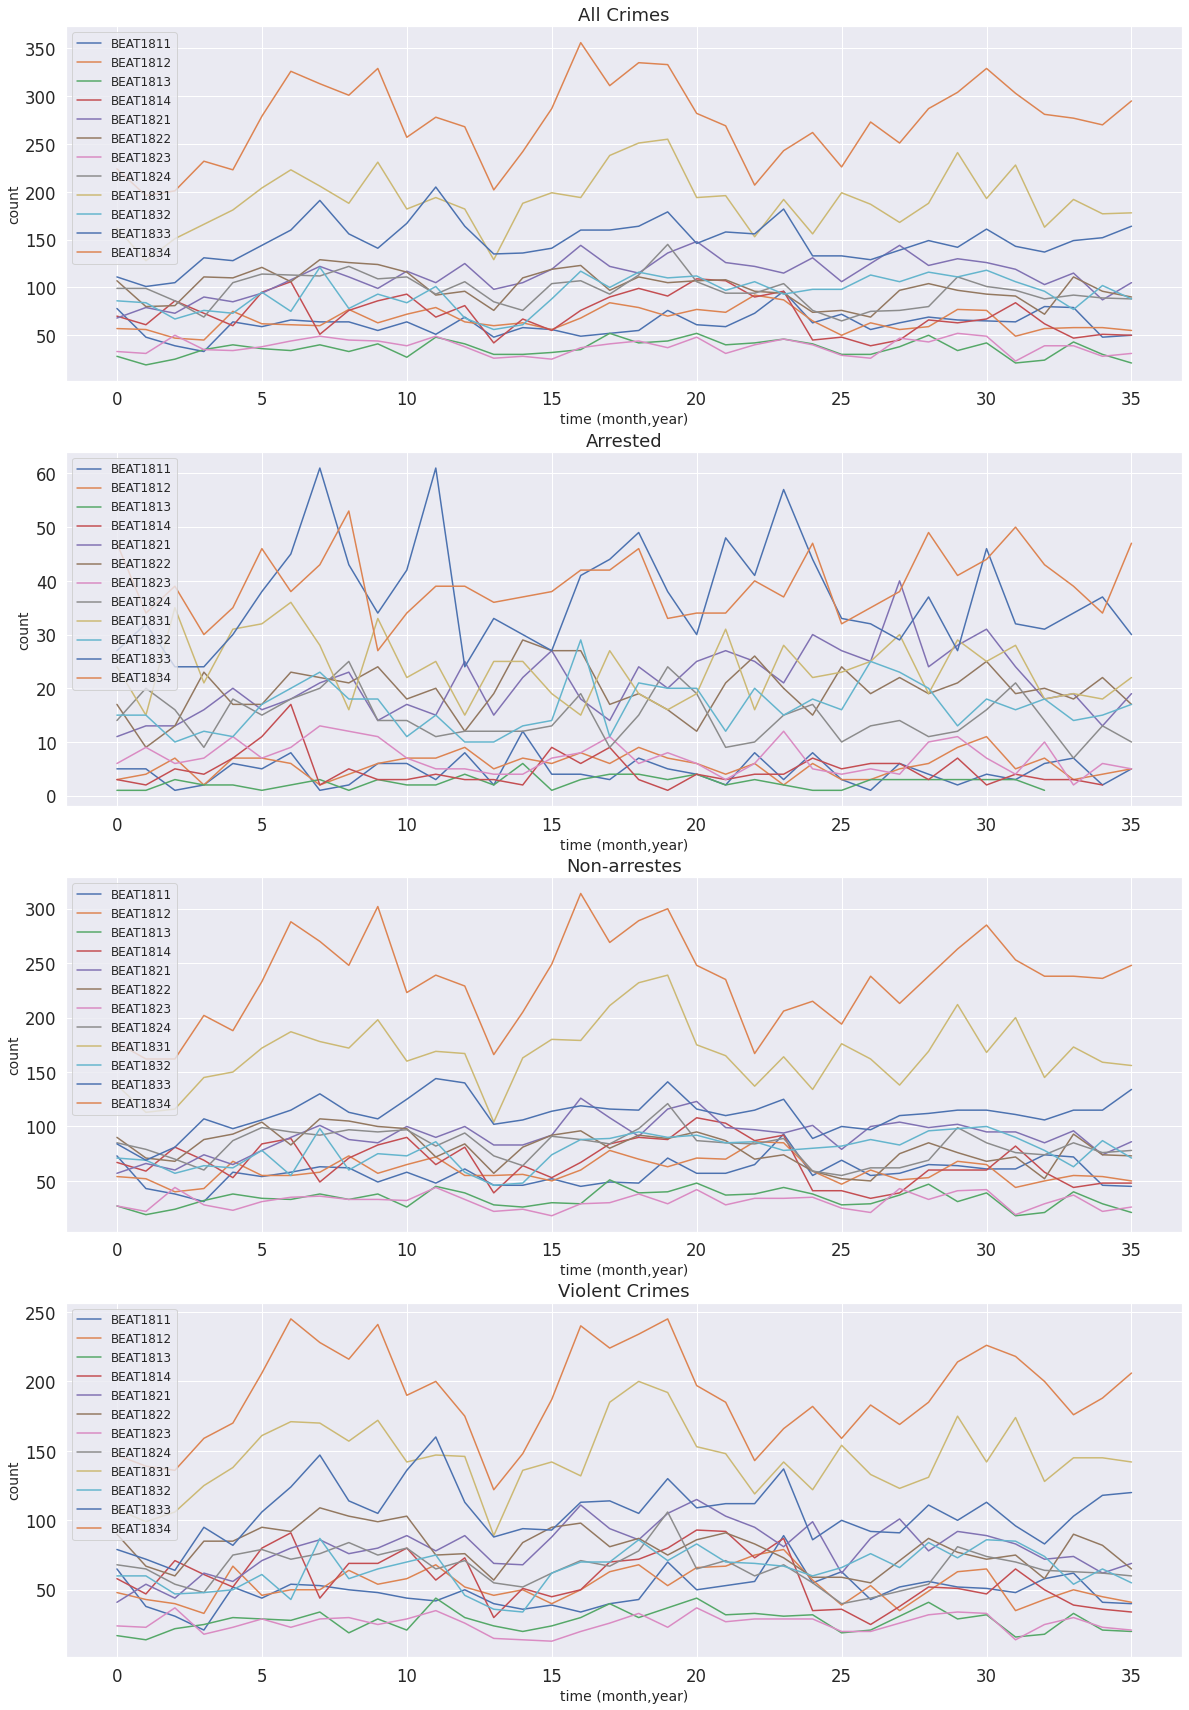

In [22]:
fig, ax = plt.subplots(4,figsize=(20,30))
plotTimeSeriesDistrict(crime_timeseries_24,ax[0],"All Crimes")
plotTimeSeriesDistrict(arrest_timeseries_24,ax[1],"Arrested")
plotTimeSeriesDistrict(non_arrest_timeseries_24,ax[2],"Non-arrestes")
plotTimeSeriesDistrict(violent_crimeseries_24,ax[3],"Violent Crimes")
plt.show()

### Stop Data Analysis

In [24]:
df_stop = pd.read_csv('/content/drive/My Drive/CPD/Stop Data/Stop_data(2016-2019).csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,5,11,12,13,14,16,18,19,22,23,29,32,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,59,63,64,65,72,74,75,99,100,101,102,103,104,109,110,111,117,119,120,121,122,123,132,134,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,159,161,163,166,169,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
#df_stop

In [26]:
# Stop data analysis for district 24
stop_data = district_wise_beats_stop(df_stop,18)
stop_data = stop_data.sort_values(by='BEAT')
df_district_stop_arrested=stop_data[(stop_data['ENFORCEMENT_TYPE_CD'] =='ARR') & (stop_data['ENFORCEMENT_ACTION_TAKEN_I']=="Y" )]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
### creating time series for stop data and arrested stops
stop_timeseries_24 = makeTimeseries(stop_data,'BEAT')
arrested_stop_timeseries_24 = makeTimeseries(df_district_stop_arrested,'BEAT')

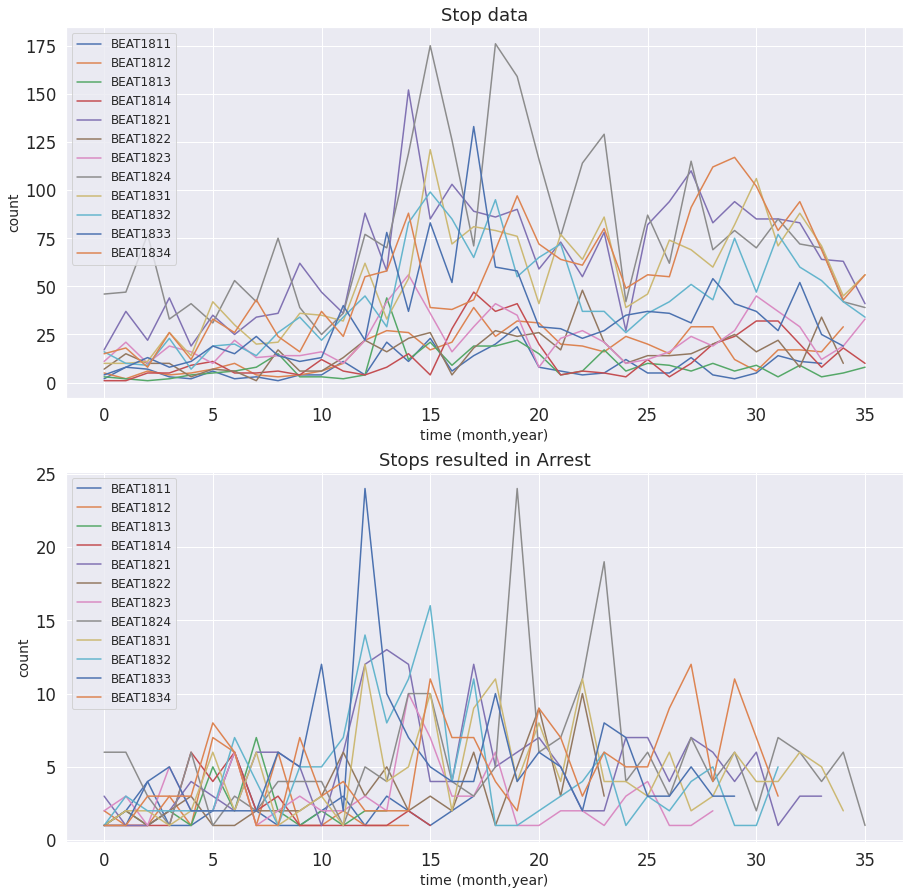

In [28]:
fig, ax = plt.subplots(2,figsize=(15,15))
plotTimeSeriesDistrict(stop_timeseries_24,ax[0],"Stop data")
plotTimeSeriesDistrict(arrested_stop_timeseries_24,ax[1],"Stops resulted in Arrest")
plt.show()

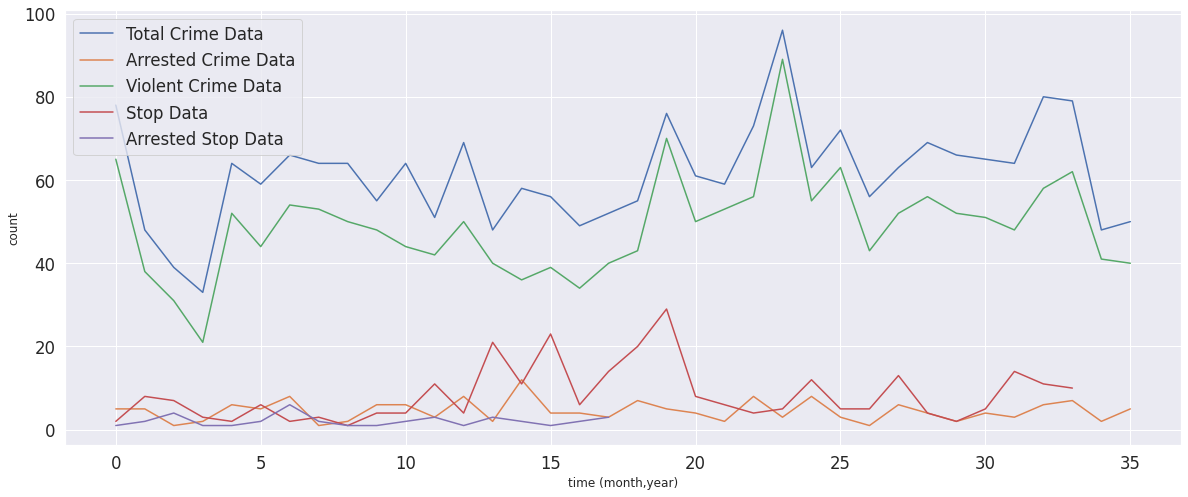

In [29]:
# Crime data and stop data for beat 2422
plotTimeSeries(1811)

In [30]:
data["freq"] = data.groupby(['Beat','Primary Type']).transform('count')['ID']

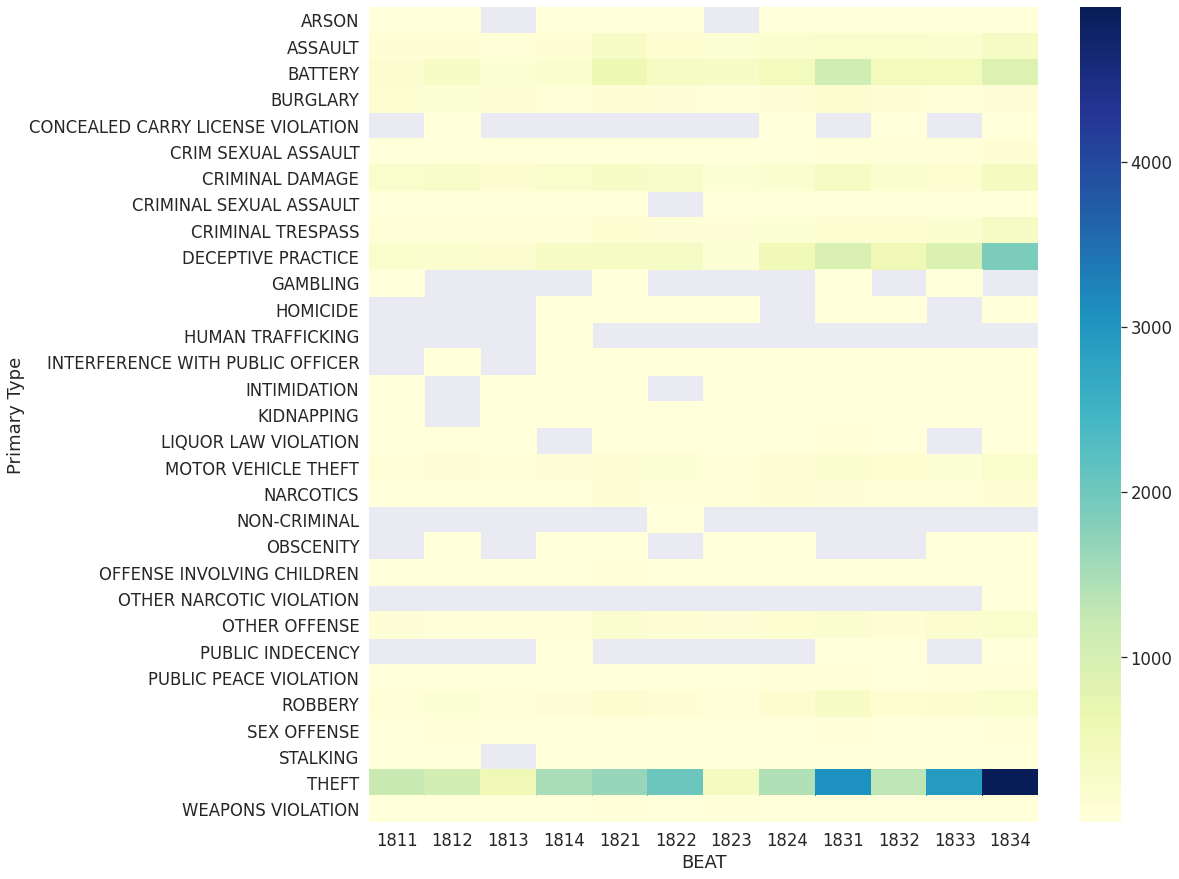

In [31]:
heatmap1_data = pd.pivot_table(data, values='freq', 
                     index=['Primary Type'], 
                     columns='BEAT')
plt.figure(figsize = (15, 15))
sns.heatmap(heatmap1_data, cmap="YlGnBu")


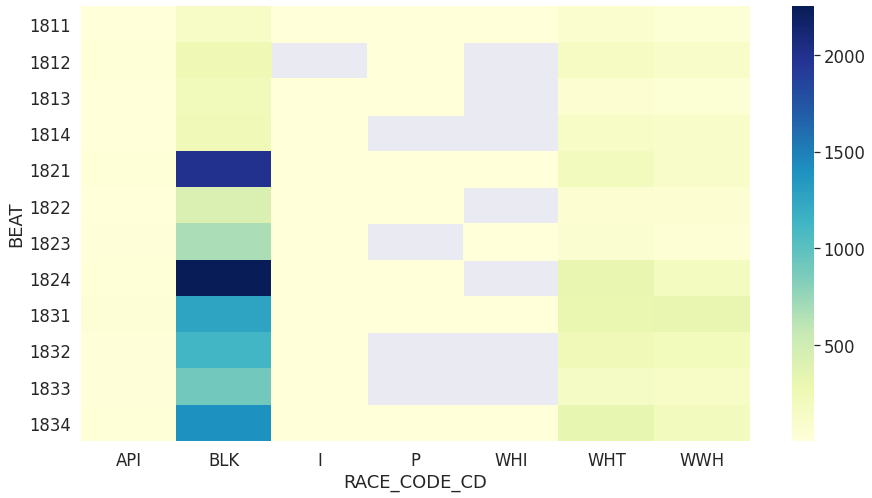

In [32]:
stop_data["freq"] = stop_data.groupby(['BEAT','RACE_CODE_CD']).transform('count')['Unnamed: 0']
stop_data["freq"] = stop_data["freq"].fillna(0)
heatmap_data = pd.pivot_table(stop_data, values='freq', 
                     index=['BEAT'], 
                     columns='RACE_CODE_CD')
plt.figure(figsize = (15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")


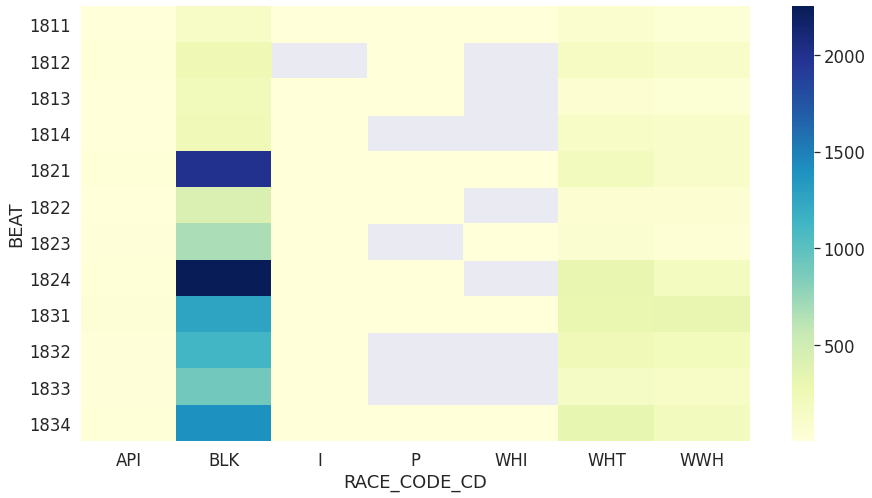

In [33]:
stop_data["s_freq"] = stop_data.groupby(['BEAT','SEX_CODE_CD']).transform('count')['Unnamed: 0']
stop_data["s_freq"] = stop_data["freq"].fillna(0)
heatmap_data = pd.pivot_table(stop_data, values='freq', 
                     index=['BEAT'], 
                     columns='RACE_CODE_CD')
plt.figure(figsize = (15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
